In [36]:
import numpy as np
import scipy.stats as stats
import csv
import itertools
import pandas as pd
import csv
import itertools
import matplotlib.pyplot as plt

from collections import defaultdict
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler



## DATA

In [4]:
# dimensioonide vahel spearman!

f = 'limesurvey_loplikud_skoorid_koond.csv'


data = []
with open(f, 'r') as fid:
    csv_reader = csv.DictReader(fid, delimiter=',')
    fieldnames = csv_reader.fieldnames
    for line in csv_reader:
        data.append(line)

col_list1 = ['abs_avg1', 'info_avg1', 'aeg_avg1', 'afek_avg1', 'inter_avg1', 'inst_avg1', 'form_avg1', 'keer_avg1', 'subj_avg1', 'spont_avg1', 'imp_avg1', 'arg_avg1']
col_list2 = ['abs_avg2', 'info_avg2', 'aeg_avg2', 'afek_avg2', 'inter_avg2', 'inst_avg2', 'form_avg2', 'keer_avg2', 'subj_avg2', 'spont_avg2', 'imp_avg2', 'arg_avg2']

# mis on vahet nt abs_avg1 ja abs_avg2 vahel?  et oli kaks gruppi hindajaid. nt ühelt grupilt tuleb keskmiseks 1.5, teiselt grupilt keskmiseks 1.4, siis
# keskmine tuleb 1.45. kui aga juhtub, et ühelt grupilt saab 1 ja teise grupi hinnangut ei tea üldse (st saab ##)
# siis DIM_avg1 korral tehakse (1 + ##)2 = 1
# ja DIM_avg2 korral saab automaatselt -1 (ehk ei tea midagi selle teksti kohta)
# ja kui mõlemad grupid annavad ## ja ##, siis mõlemad saavad keskmiseks ka -1
# valituks osutus: avg1 veerg

dim_df = pd.DataFrame(data).iloc[:, 1:].astype(float)
dim_ver1 = dim_df[col_list1]
dim_ver1.columns = [col_name.split('_')[0] for col_name in dim_ver1.columns]

dim_ver1

,abs,info,aeg,afek,inter,inst,form,keer,subj,spont,imp,arg
0,1.450000,1.666667,0.250000,0.800000,0.533333,1.250000,0.4,0.500000,1.300000,0.250,2.000,2.00
1,1.000000,2.000000,0.250000,1.375000,1.000000,1.041667,-1.0,0.600000,2.000000,0.125,0.500,1.00
2,1.500000,-1.000000,-1.000000,2.200000,1.166667,0.750000,0.0,-1.000000,2.333333,0.700,0.670,1.50
3,0.800000,-1.000000,1.000000,1.600000,0.300000,0.300000,0.4,0.000000,2.200000,0.225,1.400,2.00
4,1.250000,1.333333,-1.000000,1.000000,0.200000,0.250000,0.4,0.600000,1.050000,0.500,0.670,1.45
...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.433333,-1.000000,2.100000,2.200000,1.700000,0.666667,0.2,0.166667,1.400000,-1.000,1.025,0.80
116,0.200000,1.333333,0.733333,1.916667,0.750000,0.000000,0.5,0.200000,2.100000,0.600,1.500,1.80
117,0.000000,2.875000,2.600000,1.083333,0.791667,1.000000,1.0,1.000000,0.250000,0.200,1.250,-1.00
118,0.500000,2.125000,-1.000000,0.200000,0.500000,2.875000,0.2,0.250000,-1.000000,-1.000,1.600,-1.00


## Correlations

In [7]:
# generate dimenions pair for calculating correlation
col_list = [d.split('_')[0] for d in col_list1]
dim_pairs = [pair for pair in itertools.combinations(col_list, 2)]

# correlation calculations
corrs = []
for p in dim_pairs:
    arr1, arr2 = dim_ver1[p[0]], dim_ver1[p[1]]
    sp = stats.spearmanr(arr1, arr2)
    correlation = sp.correlation
    corrs.append([p, correlation])
corrs

[[('abs', 'info'), -0.20470010884642753],
 [('abs', 'aeg'), -0.4134427080341693],
 [('abs', 'afek'), 0.24482107698876113],
 [('abs', 'inter'), 0.08708535974459003],
 [('abs', 'inst'), 0.12292276159812246],
 [('abs', 'form'), -0.17811049413995486],
 [('abs', 'keer'), 0.28796964087200383],
 [('abs', 'subj'), 0.24221871777608942],
 [('abs', 'spont'), 0.0817534004870394],
 [('abs', 'imp'), 0.028569086097418088],
 [('abs', 'arg'), 0.29238647274320684],
 [('info', 'aeg'), 0.13749601479038553],
 [('info', 'afek'), -0.5693902662086606],
 [('info', 'inter'), -0.4488048140602797],
 [('info', 'inst'), 0.12702458189257185],
 [('info', 'form'), 0.6087401904703844],
 [('info', 'keer'), 0.41213799449270644],
 [('info', 'subj'), -0.5519354811900464],
 [('info', 'spont'), -0.4076285904630437],
 [('info', 'imp'), 0.6196128931668138],
 [('info', 'arg'), -0.12100072148381123],
 [('aeg', 'afek'), 0.015897504229361203],
 [('aeg', 'inter'), 0.015162502793957807],
 [('aeg', 'inst'), -0.16042464892153285],
 [(

In [9]:
# constructing a dataframe
data = defaultdict(dict)
for dims, val in corrs:
    dim = defaultdict()
    a, b = dims[0], dims[1]
    data[a][b] = val
    data[b][a] = val
    data[a][a] = 1
    data[b][b] = 1

dim_corr_data = pd.DataFrame.from_dict(data, orient='index')
dim_corr_data

,info,abs,aeg,afek,inter,inst,form,keer,subj,spont,imp,arg
abs,-0.204700,1.000000,-0.413443,0.244821,0.087085,0.122923,-0.178110,0.287970,0.242219,0.081753,0.028569,0.292386
info,1.000000,-0.204700,0.137496,-0.569390,-0.448805,0.127025,0.608740,0.412138,-0.551935,-0.407629,0.619613,-0.121001
aeg,0.137496,-0.413443,1.000000,0.015898,0.015163,-0.160425,0.048003,-0.126500,-0.052617,-0.007420,-0.088959,-0.249939
afek,-0.569390,0.244821,0.015898,1.000000,0.644264,-0.113551,-0.650555,-0.148009,0.637460,0.541931,-0.635362,0.257899
inter,-0.448805,0.087085,0.015163,0.644264,1.000000,0.053375,-0.442551,-0.126302,0.431433,0.405644,-0.607368,0.275251
inst,0.127025,0.122923,-0.160425,-0.113551,0.053375,1.000000,0.054680,-0.001108,-0.148311,-0.069664,0.176272,0.185275
form,0.608740,-0.178110,0.048003,-0.650555,-0.442551,0.054680,1.000000,0.352986,-0.621939,-0.626795,0.613939,-0.103298
keer,0.412138,0.287970,-0.126500,-0.148009,-0.126302,-0.001108,0.352986,1.000000,-0.190075,-0.159975,0.356785,0.105021
subj,-0.551935,0.242219,-0.052617,0.637460,0.431433,-0.148311,-0.621939,-0.190075,1.000000,0.579183,-0.552875,0.360333
spont,-0.407629,0.081753,-0.007420,0.541931,0.405644,-0.069664,-0.626795,-0.159975,0.579183,1.000000,-0.458545,0.099936


## preliminaries

In [11]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

"""
Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate
at all using the observed correlation matrix against the identity matrix.
If the test found statistically insignificant, you should not employ a factor analysis.

"""

chi_square_value, p_value = calculate_bartlett_sphericity(dim_corr_data)
chi_square_value, p_value # p-value 4.364759855646919e-37

(331.901397611993, 4.364759855646919e-37)

In [12]:
from factor_analyzer.factor_analyzer import calculate_kmo

"""
Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. 
It determines the adequacy for each observed variable and for the complete model. 
KMO estimates the proportion of variance among all the observed variable. 
Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. 
Value of KMO less than 0.6 is considered inadequate.
"""

kmo_all,kmo_model=calculate_kmo(dim_corr_data)
kmo_model 

/home/kristiina/Desktop/dok/eesti_data/limesurvey_data/venv/lib/python3.10/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.8102788602757651

'\n A high uniqueness for a variable indicates that the factors do not account well for its variance.\n'

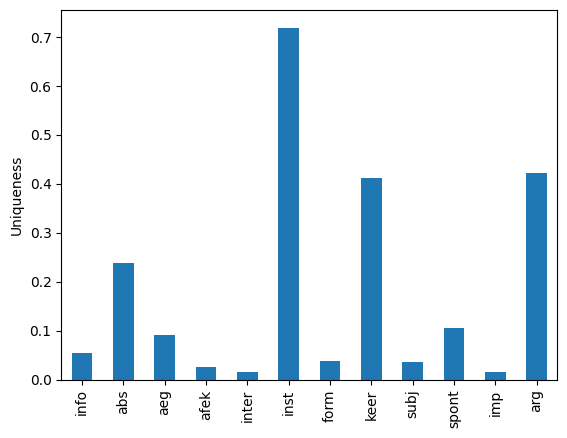

In [28]:
#sklearn
fa = FactorAnalysis(n_components = 3, rotation="varimax")
fa.fit(X)
uniqueness = pd.Series(fa.noise_variance_, index=dim_corr_data.columns)
uniqueness.plot(
    kind="bar",
    ylabel="Uniqueness"
)

"""
 A high uniqueness for a variable indicates that the factors do not account well for its variance. 
"""


'\n Opposing the uniquess, stands the communality (1-uniqueness)\n'

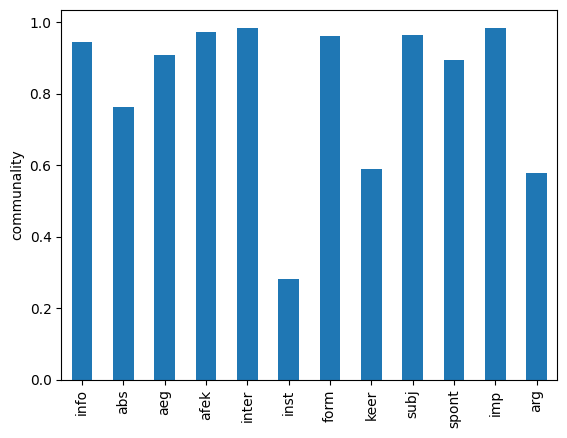

In [29]:
# sklearn
# Communality
communality = pd.Series(np.square(fa.components_.T).sum(axis=1), index=dim_corr_data.columns)
communality.plot(
    kind="bar",
    ylabel="communality"
)

"""
 Opposing the uniquess, stands the communality (1-uniqueness)
"""


In [31]:
# FA scikit-learn

X = StandardScaler().fit_transform(dim_corr_data)
factors = 25
fa = FactorAnalysis(n_components = factors, rotation="varimax") 

fa.


<bound method FactorAnalysis.score of FactorAnalysis(n_components=25, rotation='varimax')>

[[ 0.96272332  0.1141361   0.07682731]
 [-0.33116716 -0.8049808  -0.06465379]
 [ 0.06542557  0.93994748 -0.14771942]
 [-0.98461205 -0.04130029 -0.05078202]
 [-0.96369578  0.03331357  0.23625042]
 [ 0.27751362 -0.31363834  0.32529847]
 [ 0.9645794   0.06038072  0.1652762 ]
 [ 0.6861716  -0.32128274  0.12113141]
 [-0.95119368 -0.12305652 -0.20983965]
 [-0.91850335 -0.00919985 -0.22295216]
 [ 0.98314984 -0.13135347  0.0048945 ]
 [-0.49654911 -0.55715784  0.14241522]]
[[ 0.95284095  0.19102393  0.03700874]
 [-0.26668809 -0.82208134 -0.12208857]
 [-0.02151993  0.95142502 -0.06269054]
 [-0.97908678 -0.12298096 -0.00318805]
 [-0.9473089  -0.07248363  0.28807219]
 [ 0.32144889 -0.31557046  0.27979959]
 [ 0.96441883  0.13003221  0.11984747]
 [ 0.71641033 -0.26921008  0.05485484]
 [-0.94857848 -0.18710439 -0.17069217]
 [-0.92626367 -0.07010457 -0.17481894]
 [ 0.98917827 -0.04439911 -0.0584496 ]
 [-0.43934508 -0.60902183  0.11548287]]


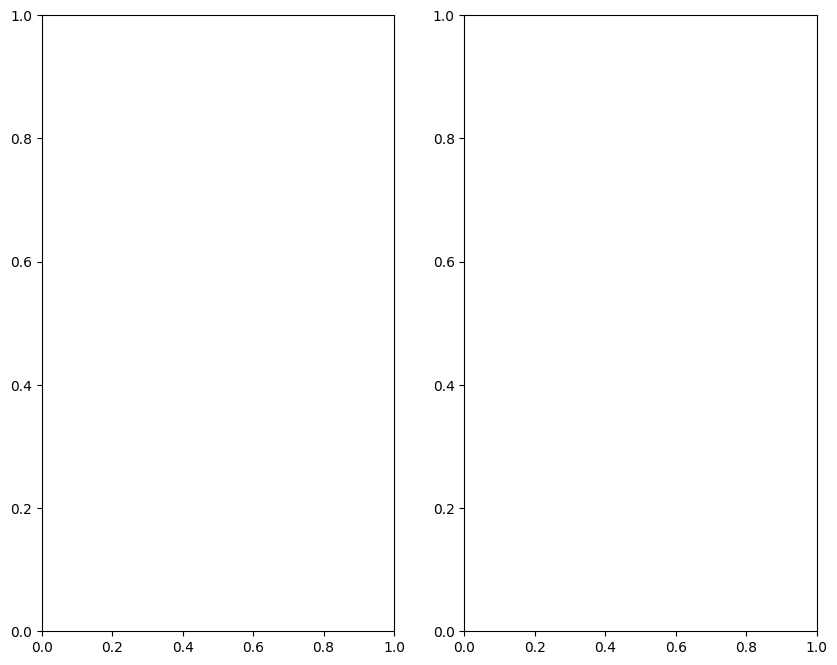

In [76]:
# FA scikit-learn

X = StandardScaler().fit_transform(dim_corr_data)

factors = 3

fas = [
    ("FA no rotation", FactorAnalysis(n_components = factors)),
    ("FA varimax", FactorAnalysis(n_components = factors, rotation="varimax")),
]  

#  Let's prepare some plots on one canvas (subplots)
fig, axes = plt.subplots(ncols=len(fas), figsize=(10, 8))

'''
And loop over the variants of our analysis `fas`, zipped with the 
plot axes `axes`
'''
for ax, (title, fa) in zip(axes, fas):
    #  Fit the model to the standardized data
    fa = fa.fit(X)
    #  and transpose the component (loading) matrix
    factor_matrix = fa.components_.T
    print(factor_matrix)
    print(f'LOADINGS:')
    for loading in fa.components_:
        print(loading)
    #  Plot the data as a heat map
    
    im = ax.imshow(factor_matrix, cmap="RdBu_r", vmax=1, vmin=-1)
    #  and add the corresponding value to the center of each cell
    for (i,j), z in np.ndenumerate(factor_matrix):
        ax.text(j, i, str(z.round(2)), ha="center", va="center")
    #  matplotlib <- metadata of the plot
    ax.set_yticks(np.arange(len(dim_corr_data.columns)))
    if ax.get_subplotspec().is_first_col():
        ax.set_yticklabels(dim_corr_data.columns)
    else:
        ax.set_yticklabels([])
    ax.set_title(title)
    
# #     factors = 2
#     ax.set_xticks([0, 1])
#     ax.set_xticklabels(["Factor 1", "Factor 2"])
    
    factor = 3
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(["Factor 1", "Factor 2", "Factor 3"])
    
# #     4 set
#     ax.set_xticks([0, 1, 2, 3])
#     ax.set_xticklabels(["Factor 1", "Factor 2", "Factor 3", "Factor 4"])
    
    
    #  and squeeze the axes tight, to save space
    plt.tight_layout()
    
#  and add a colorbar
cb = fig.colorbar(im, ax=axes, location='right', label="loadings")

plt.show()


[[ 0.96962515 -0.36082524  0.07816055 -0.98789154 -0.93898109  0.29251914
   0.97435613  0.68434196 -0.96428201 -0.92931205  0.97509747 -0.49615782]
 [ 0.09095882 -0.82082492  0.91150124 -0.01930394  0.04795284 -0.31143978
   0.0290685  -0.36193832 -0.08594518  0.03726838 -0.15174437 -0.53675586]]
[[ 0.95270477 -0.26392138 -0.02730348 -0.97909957 -0.93825788  0.32643102
   0.96452994  0.72146231 -0.9479744  -0.927423    0.98608396 -0.43105985]
 [ 0.20199021 -0.85690951  0.91443868 -0.13291491 -0.06047415 -0.27568998
   0.14105615 -0.2807408  -0.19639474 -0.06997433 -0.03846896 -0.5903108 ]]


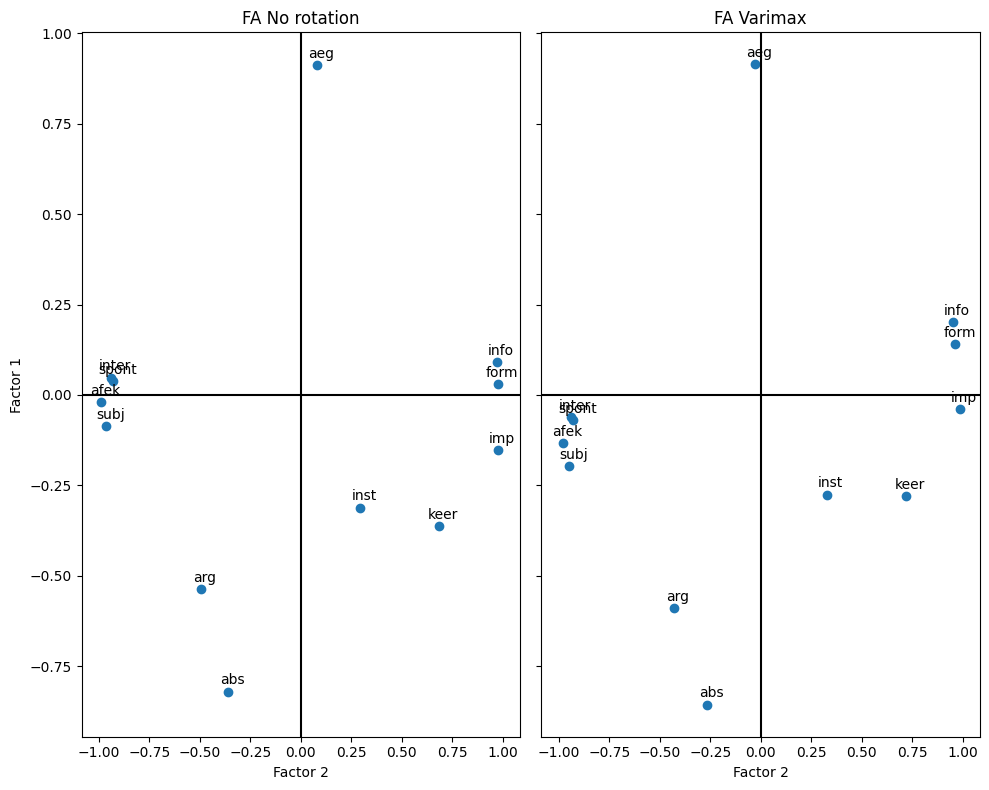

In [99]:
methods = [
    ("FA No rotation", FactorAnalysis(2,)),
    ("FA Varimax", FactorAnalysis(2, rotation="varimax")),
#     ("FA Quartimax", FactorAnalysis(2, rotation="quartimax")),
]
fig, axes = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)

for ax, (method, fa) in zip(axes, methods):
    fa = fa.fit(X)

    components = fa.components_
    print(components)

    vmax = np.abs(components).max()
    ax.scatter(components[0,:], components[1, :])
    ax.axhline(0, -1, 1, color='k')
    ax.axvline(0, -1, 1, color='k')
    for i,j, z in zip(components[0, :], components[1, :], dim_corr_data.columns):
        ax.text(i+.02, j+.02, str(z), ha="center")
    ax.set_title(str(method))
    if ax.get_subplotspec().is_first_col():
        ax.set_ylabel("Factor 1")
    ax.set_xlabel("Factor 2")

plt.tight_layout()
plt.show()

### FactorAnalayzer https://factor-analyzer.readthedocs.io/en/latest/


[7.53464075e+00 2.32763776e+00 9.67469443e-01 4.46748993e-01
 2.61848759e-01 2.01316633e-01 1.40179978e-01 4.25756940e-02
 3.35698415e-02 2.62524940e-02 1.77596513e-02 7.86333981e-17]


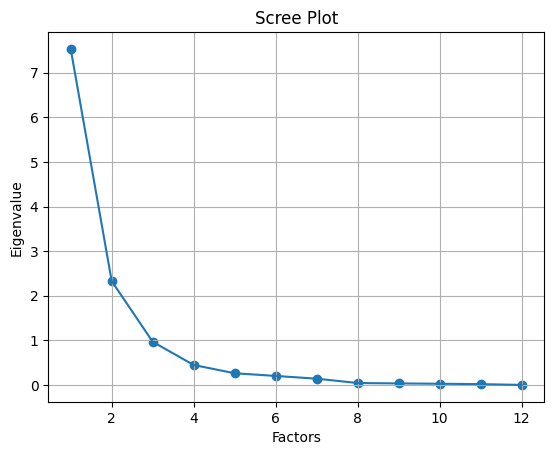

In [48]:
fa = FactorAnalyzer(12, rotation="varimax")
fa.fit(dim_corr_data)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
print(ev)

# scree plot using matplotlib
plt.scatter(range(1,dim_corr_data.shape[1]+1), ev)
plt.plot(range(1,dim_corr_data.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [44]:
fa = FactorAnalyzer(3, rotation="varimax")
fa.fit(dim_corr_data)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [47]:
loadings = fa.loadings_
variance = fa.get_factor_variance()

In [ ]:
loadings = fa.loadings_
print(loadings)

ev, v = fa.get_eigenvalues()
ev
x_val = range(1, dim_corr_data.shape[1]+1)

plt.scatter(x_val, ev)
plt.xlabel('faktorid')
plt.ylabel('eigenvalue')
plt.grid()
plt.show()